In [32]:
from model.poisson_vhmm import PoissonVHMM
import jax
from numpy.random import gamma, poisson
import numpy as np

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
### generate test data

cluster_num = 2
batch = 10
time = 100

pi_dirichlet = 5. * np.ones(cluster_num)
A_dirichlet = 10. * np.eye(cluster_num) + 1.0 * np.ones((cluster_num, cluster_num))

pi = np.random.dirichlet(pi_dirichlet)
A = np.array([np.random.dirichlet(A_dirichlet[i]) for i in range(cluster_num)])

lam_gamma_a = 3.
lam_gamma_b = 0.01

lam = np.random.gamma(lam_gamma_a, 1/lam_gamma_b, size=cluster_num)

state = np.zeros((time, batch), dtype=np.int16)
for i in range(time):
    if i == 0:
        state[0] = np.random.multinomial(n=1, pvals=pi, size=state[0].shape).argmax(-1)
    else:
        for b in range(batch):
            state[i][b] = np.random.multinomial(n=1, pvals=A[state[i-1][b]], size=1).argmax(-1)

obs = np.zeros((time, batch, cluster_num))
for i in range(time):
    for b in range(batch):
        obs[i][b] = np.random.poisson(lam[state[i][b]])


[1 1 1 1 1 0 1 1 0 0]


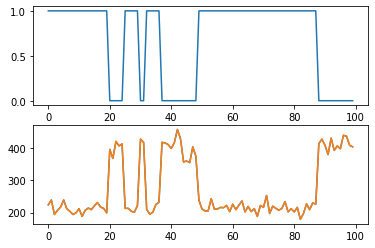

In [30]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(state[:, 0])
plt.subplot(2, 1, 2)
plt.plot(obs[:, 0])


In [37]:
import jax.numpy as jnp
cluster_num = 2
model = PoissonVHMM(cluster_num,
                    init_state_prior=jnp.array(10*jnp.ones(cluster_num)),
                    transition_prior=100*jnp.eye(cluster_num) +  1.0 * np.ones(cluster_num),
                    poisson_prior=jnp.array([1, 0.01]))

In [38]:
model.fit(jnp.array(obs))

ValueError: Incompatible shapes for broadcasting: ((1, 100, 10, 2), (100, 10, 2, 1))